# you have a data set called shopping cart it consist of four datasets 
- 1- customers.csv
- 2- orders.csv
- 3- products.csv
- 4- sales.csv
# your task in this project is: 
- 1- combine this data together
- 2- check messing values
- 3- show summary statistics
- 4- deal with date time and extract features from dates
- 5- answer at least three questions from this data
- 6- do Univariate Analysis and bivariate using plotly and dash


https://www.kaggle.com/datasets/ruchi798/shopping-cart-database

# **Downloading dataset**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir dataset

In [ ]:
%cd /content/dataset

/content/dataset


In [ ]:
!kaggle datasets download -d ruchi798/shopping-cart-database

  0% 0.00/96.1k [00:00<?, ?B/s]
100% 96.1k/96.1k [00:00<00:00, 58.5MB/s]


In [ ]:
!unzip "/content/dataset/shopping-cart-database.zip"

Archive:  /content/dataset/shopping-cart-database.zip
  inflating: customers.csv           
  inflating: orders.csv              
  inflating: products.csv            
  inflating: sales.csv               


In [ ]:
!pwd

/content/dataset


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

## Load data

In [ ]:
order = pd.read_csv('orders.csv')
order.head()

order_id  customer_id  payment order_date delivery_date
0         1           64    30811  2021-8-30    2021-09-24
1         2          473    50490   2021-2-3    2021-02-13
2         3          774    46763  2021-10-8    2021-11-03
3         4          433    39782   2021-5-6    2021-05-19
4         5          441    14719  2021-3-23    2021-03-24

In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
customer = pd.read_csv('customers.csv')
customer.head()

customer_id        customer_name       gender  age  \
0            1        Leanna Busson       Female   30   
1            2  Zabrina Harrowsmith  Genderfluid   69   
2            3      Shina Dullaghan   Polygender   59   
3            4        Hewet McVitie     Bigender   67   
4            5       Rubia Ashleigh   Polygender   30   

                     home_address  zip_code               city  \
0  8606 Victoria TerraceSuite 560      5464      Johnstonhaven   
1      8327 Kirlin SummitApt. 461      8223    New Zacharyfort   
2       269 Gemma SummitSuite 109      5661           Aliburgh   
3       743 Bailey GroveSuite 141      1729  South Justinhaven   
4         48 Hyatt ManorSuite 375      4032     Griffithsshire   

                          state    country  
0            Northern Territory  Australia  
1               South Australia  Australia  
2  Australian Capital Territory  Australia  
3                    Queensland  Australia  
4                    Queensland  Australia

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [ ]:
product = pd.read_csv('products.csv')
product.head()

product_ID product_type  product_name size colour  price  quantity  \
0           0        Shirt  Oxford Cloth   XS    red    114        66   
1           1        Shirt  Oxford Cloth    S    red    114        53   
2           2        Shirt  Oxford Cloth    M    red    114        54   
3           3        Shirt  Oxford Cloth    L    red    114        69   
4           4        Shirt  Oxford Cloth   XL    red    114        47   

                                    description  
0  A red coloured, XS sized, Oxford Cloth Shirt  
1   A red coloured, S sized, Oxford Cloth Shirt  
2   A red coloured, M sized, Oxford Cloth Shirt  
3   A red coloured, L sized, Oxford Cloth Shirt  
4  A red coloured, XL sized, Oxford Cloth Shirt

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [ ]:
sales = pd.read_csv('sales.csv')
sales.head()

sales_id  order_id  product_id  price_per_unit  quantity  total_price
0         0         1         218             106         2          212
1         1         1         481             118         1          118
2         2         1           2              96         3          288
3         3         1        1002             106         2          212
4         4         1         691             113         3          339

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


## Merge the data

In [ ]:
df_merged = pd.merge(order, customer, on='customer_id')

In [ ]:
df_merged.head()

order_id  customer_id  payment order_date delivery_date     customer_name  \
0         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
1         2          473    50490   2021-2-3    2021-02-13       Lori Briars   
2       221          473    49366   2021-8-3    2021-08-17       Lori Briars   
3         3          774    46763  2021-10-8    2021-11-03      Ellynn Korba   
4       353          774    46198  2021-3-30    2021-04-05      Ellynn Korba   

        gender  age                   home_address  zip_code  \
0  Genderfluid   75      4927 Alice MeadowApt. 960      7787   
1         Male   61  531 Schmitt BoulevardApt. 010      1744   
2         Male   61  531 Schmitt BoulevardApt. 010      1744   
3  Genderqueer   34       2096 Wilson MewsApt. 714      8590   
4  Genderqueer   34       2096 Wilson MewsApt. 714      8590   

                 city            state    country  
0      Sanfordborough  South Australia  Australia  
1             Annaton  South Australia  Australia  
2             Annaton  South Australia  Australia  
3  West Jonathanshire         Tasmania  Australia  
4  West Jonathanshire         Tasmania  Australia

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
 5   customer_name  1000 non-null   object
 6   gender         1000 non-null   object
 7   age            1000 non-null   int64 
 8   home_address   1000 non-null   object
 9   zip_code       1000 non-null   int64 
 10  city           1000 non-null   object
 11  state          1000 non-null   object
 12  country        1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 109.4+ KB


In [ ]:
df_merged_1 = pd.merge(df_merged, sales, on='order_id')

In [ ]:
df_merged_1.head()

order_id  customer_id  payment order_date delivery_date     customer_name  \
0         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
1         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
2         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
3         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
4         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   

        gender  age               home_address  zip_code            city  \
0  Genderfluid   75  4927 Alice MeadowApt. 960      7787  Sanfordborough   
1  Genderfluid   75  4927 Alice MeadowApt. 960      7787  Sanfordborough   
2  Genderfluid   75  4927 Alice MeadowApt. 960      7787  Sanfordborough   
3  Genderfluid   75  4927 Alice MeadowApt. 960      7787  Sanfordborough   
4  Genderfluid   75  4927 Alice MeadowApt. 960      7787  Sanfordborough   

             state    country  sales_id  product_id  price_per_unit  quantity  \
0  South Australia  Australia         0         218             106         2   
1  South Australia  Australia         1         481             118         1   
2  South Australia  Australia         2           2              96         3   
3  South Australia  Australia         3        1002             106         2   
4  South Australia  Australia         4         691             113         3   

   total_price  
0          212  
1          118  
2          288  
3          212  
4          339

In [ ]:
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   customer_id     5000 non-null   int64 
 2   payment         5000 non-null   int64 
 3   order_date      5000 non-null   object
 4   delivery_date   5000 non-null   object
 5   customer_name   5000 non-null   object
 6   gender          5000 non-null   object
 7   age             5000 non-null   int64 
 8   home_address    5000 non-null   object
 9   zip_code        5000 non-null   int64 
 10  city            5000 non-null   object
 11  state           5000 non-null   object
 12  country         5000 non-null   object
 13  sales_id        5000 non-null   int64 
 14  product_id      5000 non-null   int64 
 15  price_per_unit  5000 non-null   int64 
 16  quantity        5000 non-null   int64 
 17  total_price     5000 non-null   int64 
dtypes: int64

In [ ]:
df = pd.merge(df_merged_1, product, left_on='product_id', right_on='product_ID')

## EDA

In [ ]:
df.head()

order_id  customer_id  payment order_date delivery_date     customer_name  \
0         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
1       233          996    29939   2021-9-3    2021-09-19    Elvira Sarfati   
2       924          786    43116   2021-4-4    2021-04-18   Lorine McLugish   
3         1           64    30811  2021-8-30    2021-09-24  Annabella Devote   
4        79          236    54340  2021-3-16    2021-03-25    Anders Couvert   

        gender  age                  home_address  zip_code  ... quantity_x  \
0  Genderfluid   75     4927 Alice MeadowApt. 960      7787  ...          2   
1      Agender   59  0433 Armstrong HillSuite 974      7613  ...          3   
2      Agender   23    145 Abigail SummitApt. 514      4731  ...          2   
3  Genderfluid   75     4927 Alice MeadowApt. 960      7787  ...          1   
4   Non-binary   80       64 Phillips RunApt. 722      2752  ...          2   

  total_price product_ID  product_type  product_name  size  colour  price  \
0         212        218         Shirt      Chambray     L  orange    105   
1         318        218         Shirt      Chambray     L  orange    105   
2         212        218         Shirt      Chambray     L  orange    105   
3         118        481        Jacket        Puffer     S  indigo    110   
4         236        481        Jacket        Puffer     S  indigo    110   

   quantity_y                                 description  
0          44  A orange coloured, L sized, Chambray Shirt  
1          44  A orange coloured, L sized, Chambray Shirt  
2          44  A orange coloured, L sized, Chambray Shirt  
3          62   A indigo coloured, S sized, Puffer Jacket  
4          62   A indigo coloured, S sized, Puffer Jacket  

[5 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   customer_id     5000 non-null   int64 
 2   payment         5000 non-null   int64 
 3   order_date      5000 non-null   object
 4   delivery_date   5000 non-null   object
 5   customer_name   5000 non-null   object
 6   gender          5000 non-null   object
 7   age             5000 non-null   int64 
 8   home_address    5000 non-null   object
 9   zip_code        5000 non-null   int64 
 10  city            5000 non-null   object
 11  state           5000 non-null   object
 12  country         5000 non-null   object
 13  sales_id        5000 non-null   int64 
 14  product_id      5000 non-null   int64 
 15  price_per_unit  5000 non-null   int64 
 16  quantity_x      5000 non-null   int64 
 17  total_price     5000 non-null   int64 
 18  product_

In [ ]:
df.isna().sum()

order_id          0
customer_id       0
payment           0
order_date        0
delivery_date     0
customer_name     0
gender            0
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
sales_id          0
product_id        0
price_per_unit    0
quantity_x        0
total_price       0
product_ID        0
product_type      0
product_name      0
size              0
colour            0
price             0
quantity_y        0
description       0
dtype: int64

In [ ]:
df.describe()

order_id  customer_id       payment          age     zip_code  \
count  5000.000000  5000.000000   5000.000000  5000.000000  5000.000000   
mean    503.038200   504.563000  33976.785000    48.760400  4912.355600   
std     285.964418   276.504896  14612.706539    17.577519  2907.367939   
min       1.000000     1.000000  10043.000000    20.000000    52.000000   
25%     258.000000   276.000000  20627.000000    34.000000  2273.000000   
50%     504.500000   509.000000  34259.000000    48.000000  4750.000000   
75%     749.000000   733.000000  46608.000000    63.000000  7460.250000   
max     999.000000  1000.000000  59910.000000    80.000000  9998.000000   

          sales_id   product_id  price_per_unit  quantity_x  total_price  \
count  5000.000000  5000.000000     5000.000000  5000.00000  5000.000000   
mean   2499.500000   634.053200      103.501600     1.99240   206.360000   
std    1443.520003   363.255794        9.195004     0.80751    86.357457   
min       0.000000     1.000000       90.000000     1.00000    90.000000   
25%    1249.750000   323.000000       95.000000     1.00000   112.000000   
50%    2499.500000   635.000000      102.000000     2.00000   204.000000   
75%    3749.250000   951.000000      112.000000     3.00000   285.000000   
max    4999.000000  1259.000000      119.000000     3.00000   357.000000   

        product_ID        price   quantity_y  
count  5000.000000  5000.000000  5000.000000  
mean    634.053200   105.665400    60.083400  
std     363.255794     9.735564    11.682523  
min       1.000000    90.000000    40.000000  
25%     323.000000    95.000000    50.000000  
50%     635.000000   108.000000    60.000000  
75%     951.000000   114.000000    70.000000  
max    1259.000000   119.000000    80.000000

In [ ]:
df.describe(include='O')

order_date delivery_date   customer_name  gender  \
count        5000          5000            5000    5000   
unique        291           304             616       8   
top     2021-6-21    2021-09-12  Kristofor Roos  Female   
freq           51            49              37     712   

                    home_address        city            state    country  \
count                       5000        5000             5000       5000   
unique                       616         604                8          1   
top     5567 Clarke MallApt. 756  Jordanside  South Australia  Australia   
freq                          37          37              718       5000   

       product_type product_name  size colour  \
count          5000         5000  5000   5000   
unique            3           35     5      7   
top        Trousers        Denim     M   blue   
freq           1683          273  1022    762   

                                      description  
count                                        5000  
unique                                       1233  
top     A orange coloured, L sized, Flannel Shirt  
freq                                           13

In [ ]:
df.corr()

order_id  customer_id   payment       age  zip_code  sales_id  \
order_id        1.000000    -0.015749  0.008699 -0.030262 -0.072293  0.999953   
customer_id    -0.015749     1.000000 -0.015179 -0.028484  0.004816 -0.015520   
payment         0.008699    -0.015179  1.000000  0.017305  0.006845  0.008762   
age            -0.030262    -0.028484  0.017305  1.000000 -0.009591 -0.030181   
zip_code       -0.072293     0.004816  0.006845 -0.009591  1.000000 -0.072512   
sales_id        0.999953    -0.015520  0.008762 -0.030181 -0.072512  1.000000   
product_id     -0.001160    -0.014617 -0.005194 -0.005061  0.016309 -0.001371   
price_per_unit -0.001667     0.018243  0.010412  0.012690 -0.016110 -0.001624   
quantity_x      0.012749     0.014590  0.011697  0.022322  0.017419  0.012686   
total_price     0.011283     0.018069  0.013233  0.023692  0.010970  0.011228   
product_ID     -0.001160    -0.014617 -0.005194 -0.005061  0.016309 -0.001371   
price          -0.011502     0.009054 -0.001686 -0.005538  0.001066 -0.011316   
quantity_y      0.000643    -0.009934  0.018504  0.004455 -0.023266  0.000679   

                product_id  price_per_unit  quantity_x  total_price  \
order_id         -0.001160       -0.001667    0.012749     0.011283   
customer_id      -0.014617        0.018243    0.014590     0.018069   
payment          -0.005194        0.010412    0.011697     0.013233   
age              -0.005061        0.012690    0.022322     0.023692   
zip_code          0.016309       -0.016110    0.017419     0.010970   
sales_id         -0.001371       -0.001624    0.012686     0.011228   
product_id        1.000000        0.022051    0.009468     0.013958   
price_per_unit    0.022051        1.000000    0.019318     0.232178   
quantity_x        0.009468        0.019318    1.000000     0.973141   
total_price       0.013958        0.232178    0.973141     1.000000   
product_ID        1.000000        0.022051    0.009468     0.013958   
price            -0.355570       -0.121545   -0.022359    -0.046465   
quantity_y       -0.020543       -0.041999   -0.019187    -0.031757   

                product_ID     price  quantity_y  
order_id         -0.001160 -0.011502    0.000643  
customer_id      -0.014617  0.009054   -0.009934  
payment          -0.005194 -0.001686    0.018504  
age              -0.005061 -0.005538    0.004455  
zip_code          0.016309  0.001066   -0.023266  
sales_id         -0.001371 -0.011316    0.000679  
product_id        1.000000 -0.355570   -0.020543  
price_per_unit    0.022051 -0.121545   -0.041999  
quantity_x        0.009468 -0.022359   -0.019187  
total_price       0.013958 -0.046465   -0.031757  
product_ID        1.000000 -0.355570   -0.020543  
price            -0.355570  1.000000    0.079856  
quantity_y       -0.020543  0.079856    1.000000

In [ ]:
df.to_csv('data.csv')

In [ ]:
# what is the unique values in each categorical column
categorical = df.select_dtypes(["category", "object"]).columns.to_list()

In [ ]:
for cat in categorical:
  print(f"{cat} : {df[cat].nunique()}")
  print(f"{cat} : {df[cat].unique()}")

order_date : 291
order_date : ['2021-8-30' '2021-9-3' '2021-4-4' '2021-3-16' '2021-3-30' '2021-1-26'
 '2021-10-3' '2021-3-15' '2021-8-19' '2021-7-7' '2021-4-3' '2021-2-5'
 '2021-6-2' '2021-10-13' '2021-8-25' '2021-1-29' '2021-10-20' '2021-6-29'
 '2021-5-26' '2021-3-22' '2021-7-25' '2021-5-5' '2021-2-3' '2021-7-19'
 '2021-8-23' '2021-4-18' '2021-7-22' '2021-3-17' '2021-1-25' '2021-4-25'
 '2021-2-4' '2021-9-25' '2021-9-16' '2021-7-3' '2021-4-11' '2021-5-18'
 '2021-8-6' '2021-6-21' '2021-2-22' '2021-10-14' '2021-8-3' '2021-3-3'
 '2021-1-9' '2021-2-11' '2021-3-28' '2021-10-21' '2021-8-17' '2021-2-25'
 '2021-6-15' '2021-2-7' '2021-7-16' '2021-3-4' '2021-6-23' '2021-7-26'
 '2021-6-10' '2021-4-8' '2021-10-8' '2021-6-18' '2021-9-30' '2021-4-7'
 '2021-2-26' '2021-5-21' '2021-7-1' '2021-5-6' '2021-6-6' '2021-6-13'
 '2021-2-18' '2021-6-20' '2021-9-6' '2021-10-17' '2021-4-15' '2021-9-18'
 '2021-3-11' '2021-3-23' '2021-3-20' '2021-3-13' '2021-7-23' '2021-3-12'
 '2021-1-12' '2021-1-31' '2021-4-6' '2

In [ ]:
# convert to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [ ]:
# what is the maximum number of days between the order and delivery
df['differance'] = df['delivery_date']- df['order_date']

In [ ]:
df.head()

order_id  customer_id  payment order_date delivery_date     customer_name  \
0         1           64    30811 2021-08-30    2021-09-24  Annabella Devote   
1       233          996    29939 2021-09-03    2021-09-19    Elvira Sarfati   
2       924          786    43116 2021-04-04    2021-04-18   Lorine McLugish   
3         1           64    30811 2021-08-30    2021-09-24  Annabella Devote   
4        79          236    54340 2021-03-16    2021-03-25    Anders Couvert   

        gender  age                  home_address  zip_code  ... total_price  \
0  Genderfluid   75     4927 Alice MeadowApt. 960      7787  ...         212   
1      Agender   59  0433 Armstrong HillSuite 974      7613  ...         318   
2      Agender   23    145 Abigail SummitApt. 514      4731  ...         212   
3  Genderfluid   75     4927 Alice MeadowApt. 960      7787  ...         118   
4   Non-binary   80       64 Phillips RunApt. 722      2752  ...         236   

  product_ID product_type  product_name  size  colour  price  quantity_y  \
0        218        Shirt      Chambray     L  orange    105          44   
1        218        Shirt      Chambray     L  orange    105          44   
2        218        Shirt      Chambray     L  orange    105          44   
3        481       Jacket        Puffer     S  indigo    110          62   
4        481       Jacket        Puffer     S  indigo    110          62   

                                  description differance  
0  A orange coloured, L sized, Chambray Shirt    25 days  
1  A orange coloured, L sized, Chambray Shirt    16 days  
2  A orange coloured, L sized, Chambray Shirt    14 days  
3   A indigo coloured, S sized, Puffer Jacket    25 days  
4   A indigo coloured, S sized, Puffer Jacket     9 days  

[5 rows x 27 columns]

In [ ]:
df['differance'].sort_values(ascending=False).head(20)

3452   27 days
152    27 days
156    27 days
1660   27 days
3798   27 days
3793   27 days
1628   27 days
161    27 days
474    27 days
2607   27 days
164    27 days
3757   27 days
2628   27 days
1569   27 days
3718   27 days
3715   27 days
3705   27 days
1544   27 days
175    27 days
3656   27 days
Name: differance, dtype: timedelta64[ns]

In [ ]:
# extract year , month and day name for order data
df['year_order'] = df['order_date'].dt.year
df['month_order'] = df['order_date'].dt.month
df["day_order"] = df["order_date"].dt.day
df["name_day_order"] = df["order_date"].dt.day_name()

In [ ]:
# extract year , month and day name for delivery data
df['year_delivery'] = df['delivery_date'].dt.year
df['month_delivery'] = df['delivery_date'].dt.month
df["day_delivery"] = df["delivery_date"].dt.day
df["name_day_delivery"] = df["delivery_date"].dt.day_name()

In [ ]:
df.head()

order_id  customer_id  payment order_date delivery_date     customer_name  \
0         1           64    30811 2021-08-30    2021-09-24  Annabella Devote   
1       233          996    29939 2021-09-03    2021-09-19    Elvira Sarfati   
2       924          786    43116 2021-04-04    2021-04-18   Lorine McLugish   
3         1           64    30811 2021-08-30    2021-09-24  Annabella Devote   
4        79          236    54340 2021-03-16    2021-03-25    Anders Couvert   

        gender  age                  home_address  zip_code  ...  \
0  Genderfluid   75     4927 Alice MeadowApt. 960      7787  ...   
1      Agender   59  0433 Armstrong HillSuite 974      7613  ...   
2      Agender   23    145 Abigail SummitApt. 514      4731  ...   
3  Genderfluid   75     4927 Alice MeadowApt. 960      7787  ...   
4   Non-binary   80       64 Phillips RunApt. 722      2752  ...   

                                  description differance year_order  \
0  A orange coloured, L sized, Chambray Shirt    25 days       2021   
1  A orange coloured, L sized, Chambray Shirt    16 days       2021   
2  A orange coloured, L sized, Chambray Shirt    14 days       2021   
3   A indigo coloured, S sized, Puffer Jacket    25 days       2021   
4   A indigo coloured, S sized, Puffer Jacket     9 days       2021   

   month_order  day_order  name_day_order  year_delivery  month_delivery  \
0            8         30          Monday           2021               9   
1            9          3          Friday           2021               9   
2            4          4          Sunday           2021               4   
3            8         30          Monday           2021               9   
4            3         16         Tuesday           2021               3   

   day_delivery name_day_delivery  
0            24            Friday  
1            19            Sunday  
2            18            Sunday  
3            24            Friday  
4            25          Thursday  

[5 rows x 35 columns]

## univariate analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

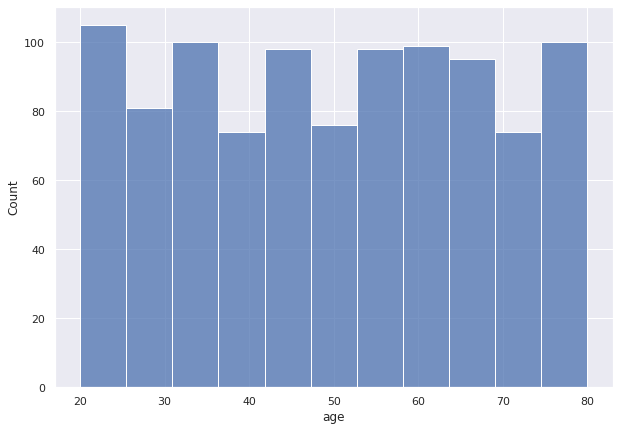

In [ ]:
mFigure = plt.figure(figsize=(10, 7))
sns.histplot(data=customer, x="age")
plt.show()

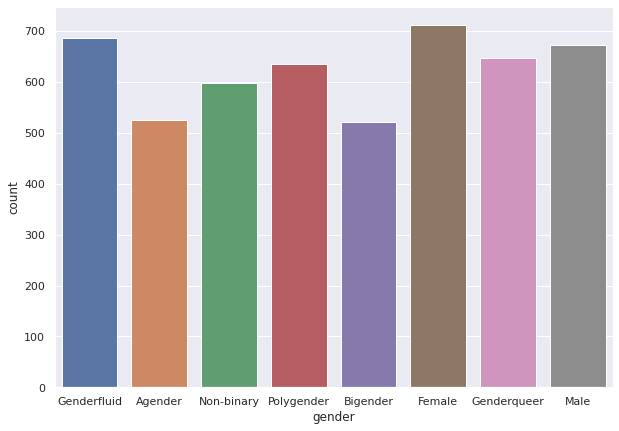

In [ ]:
mFigure = plt.figure(figsize=(10, 7))
sns.countplot(x="gender", data=df)
plt.show()

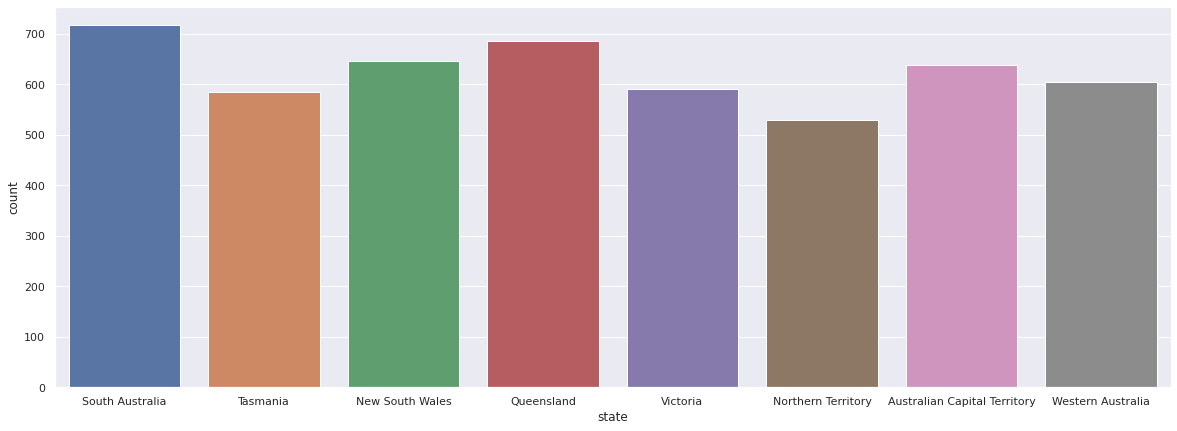

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.countplot(x="state", data=df)
plt.show()

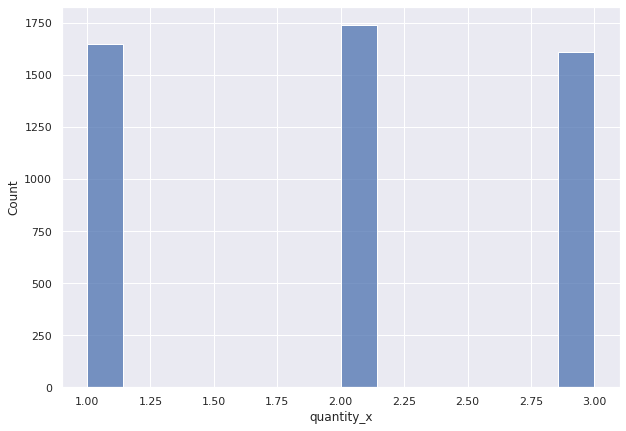

In [ ]:
mFigure = plt.figure(figsize=(10, 7))
sns.histplot(data=df, x="quantity_x")
plt.show()

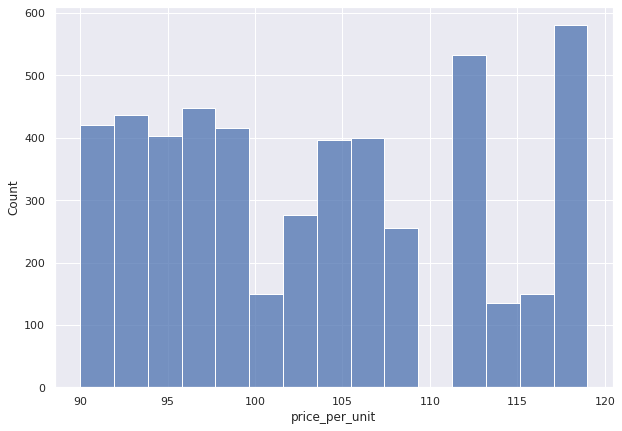

In [ ]:
mFigure = plt.figure(figsize=(10, 7))
sns.histplot(data=df, x="price_per_unit")
plt.show()

In [ ]:
df.differance.value_counts()

2 days     252
5 days     242
14 days    235
20 days    226
21 days    226
11 days    222
25 days    220
13 days    212
10 days    204
27 days    203
9 days     198
8 days     195
16 days    193
15 days    187
3 days     186
17 days    176
24 days    171
22 days    170
12 days    170
6 days     164
23 days    153
18 days    153
7 days     151
26 days    135
19 days    127
1 days     120
4 days     109
Name: differance, dtype: int64

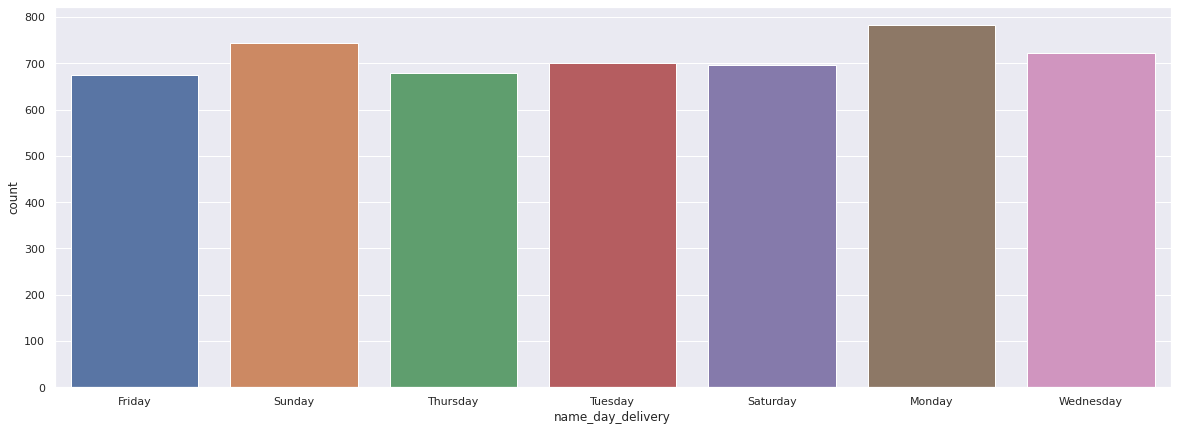

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.countplot(x="name_day_delivery", data=df)
plt.show()

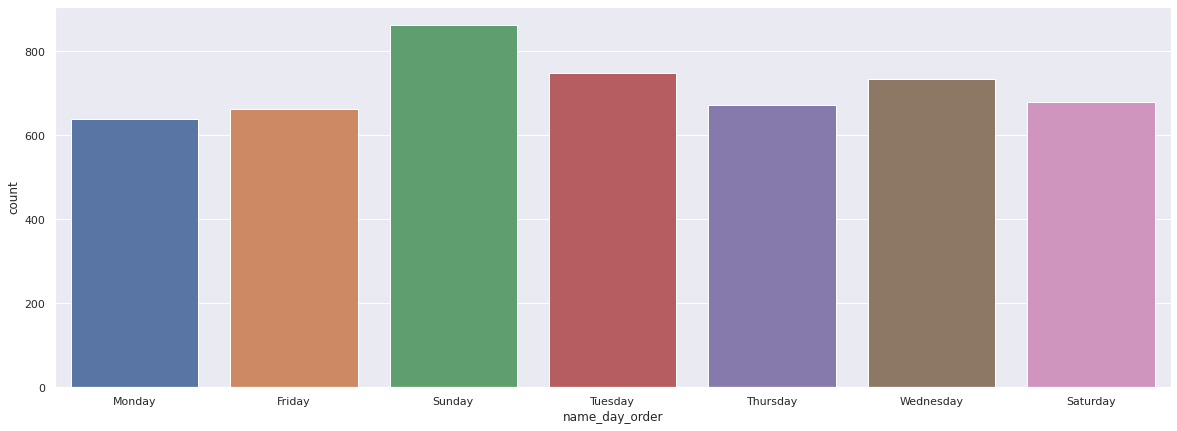

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.countplot(x="name_day_order", data=df)
plt.show()

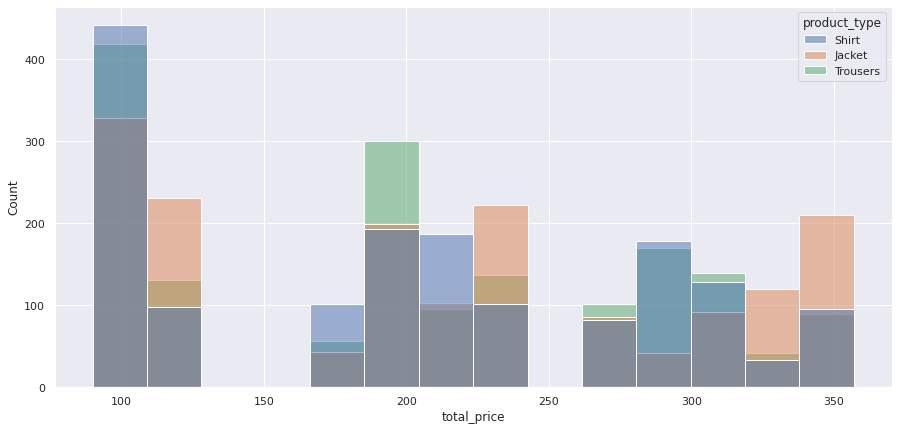

In [ ]:
mFigure = plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="total_price", hue='product_type')
plt.show()

In [ ]:
import plotly.express as px


In [ ]:
df['gender'].unique()

array(['Genderfluid', 'Agender', 'Non-binary', 'Polygender', 'Bigender',
       'Female', 'Genderqueer', 'Male'], dtype=object)

In [ ]:
temp = df.groupby('gender').agg({
    'total_price': 'sum'
}).reset_index()

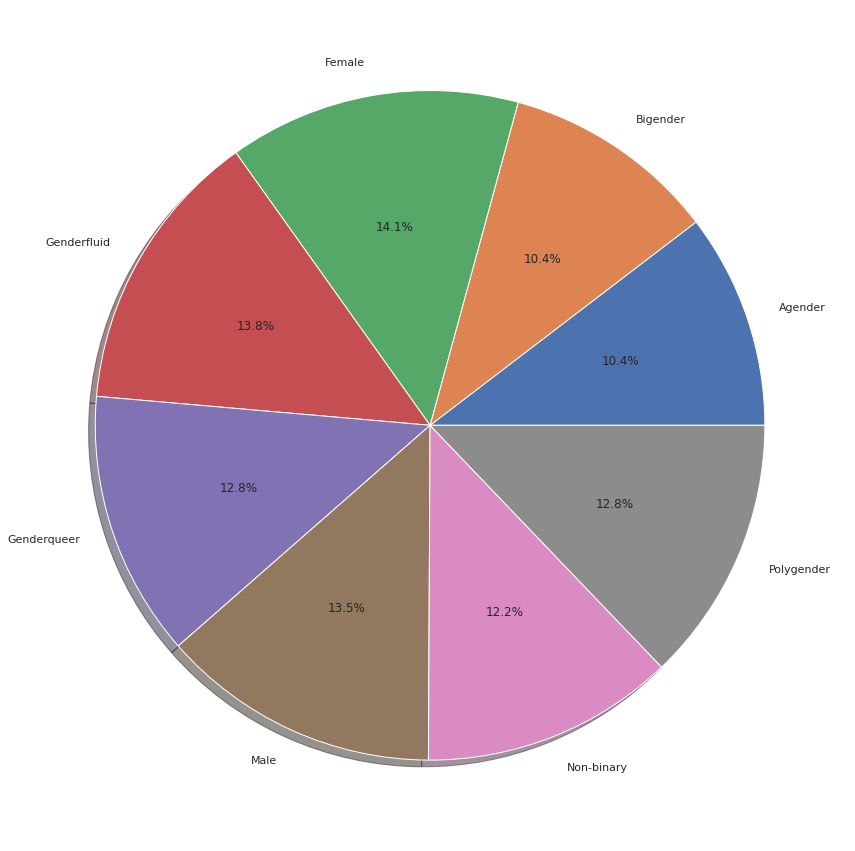

In [ ]:
mFigure = plt.figure(figsize=(15, 20))
plt.pie(temp['total_price'], labels=temp['gender'], autopct="%.1f%%", shadow=True)
plt.show()

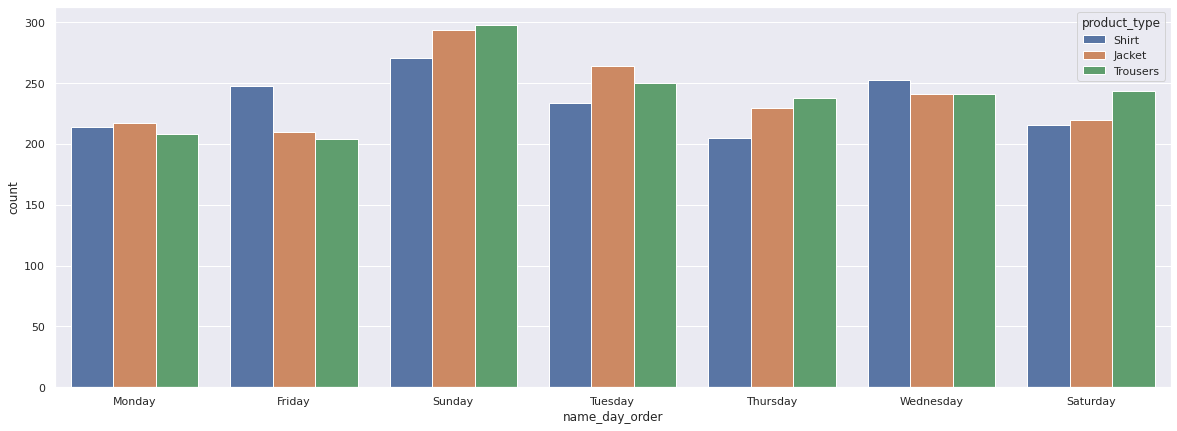

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.countplot(data=df, x="name_day_order", hue='product_type')
plt.show()

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'payment', 'order_date', 'delivery_date',
       'customer_name', 'gender', 'age', 'home_address', 'zip_code', 'city',
       'state', 'country', 'sales_id', 'product_id', 'price_per_unit',
       'quantity_x', 'total_price', 'product_ID', 'product_type',
       'product_name', 'size', 'colour', 'price', 'quantity_y', 'description',
       'differance', 'year_order', 'month_order', 'day_order',
       'name_day_order', 'year_delivery', 'month_delivery', 'day_delivery',
       'name_day_delivery'],
      dtype='object')

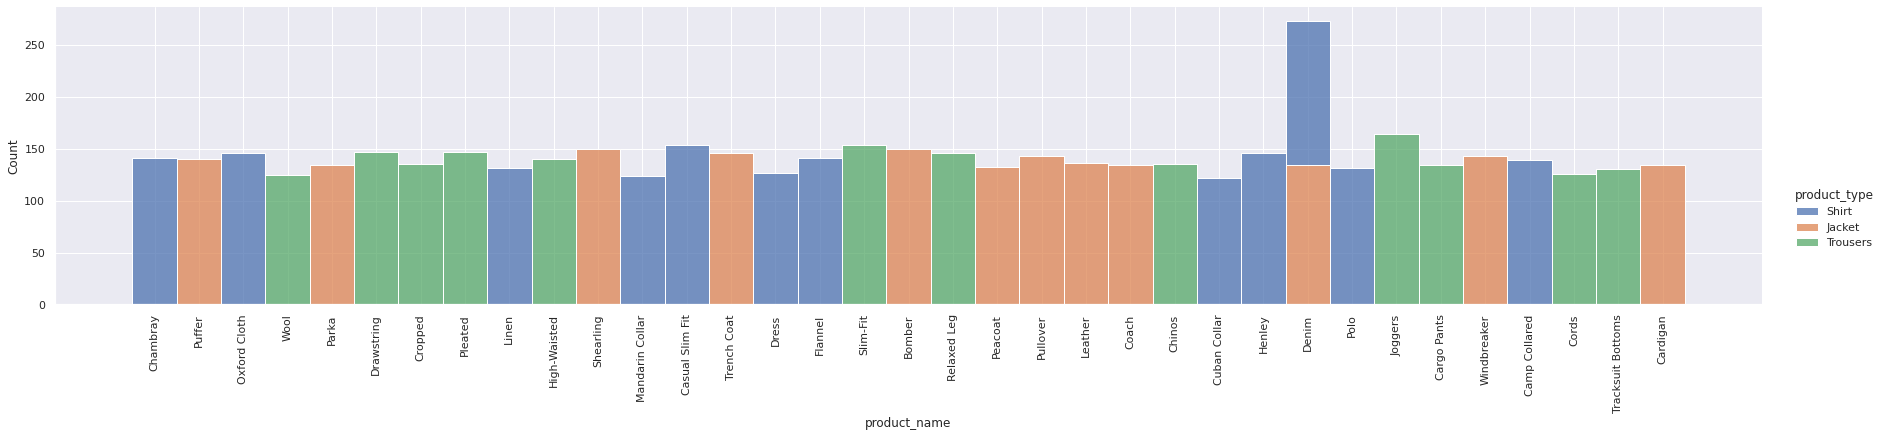

In [ ]:
sns.displot(data=df, x="product_name", hue='product_type', multiple='stack', height=5, aspect=5)
_ = plt.xticks(rotation=90)


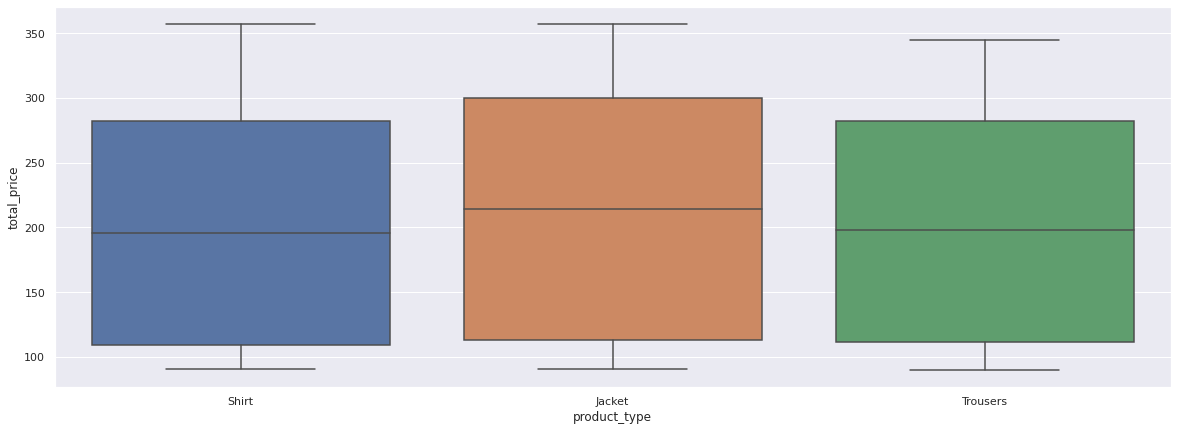

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.boxplot(x="product_type", y="total_price", data=df)
plt.show()

## bivariant

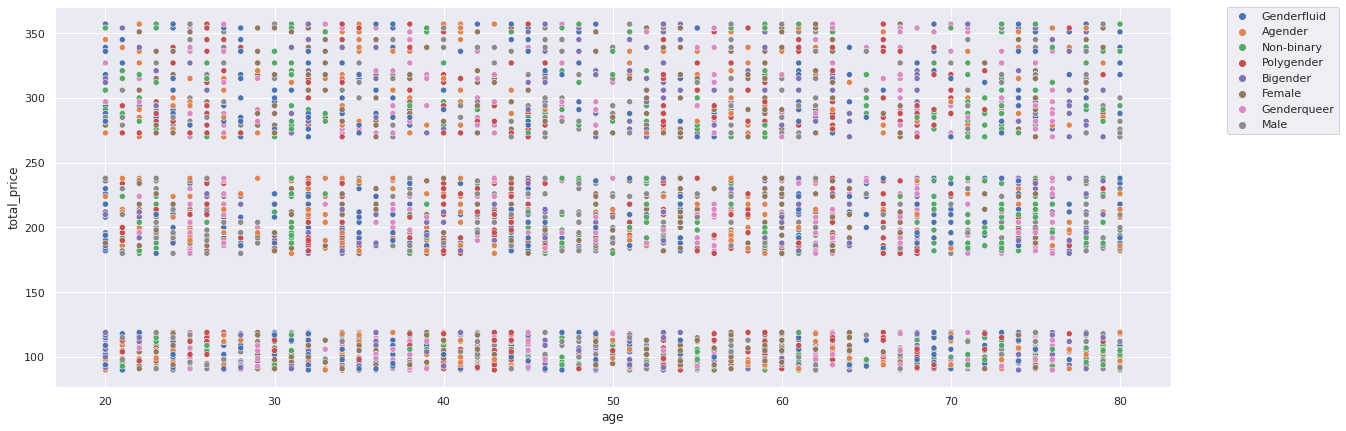

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x="age", y="total_price", hue="gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


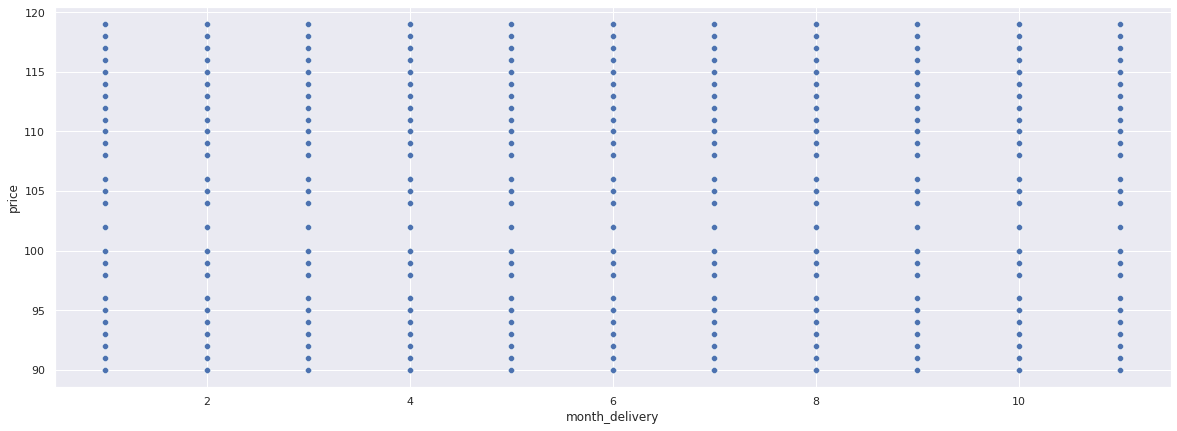

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x="month_delivery", y="price")
plt.show()

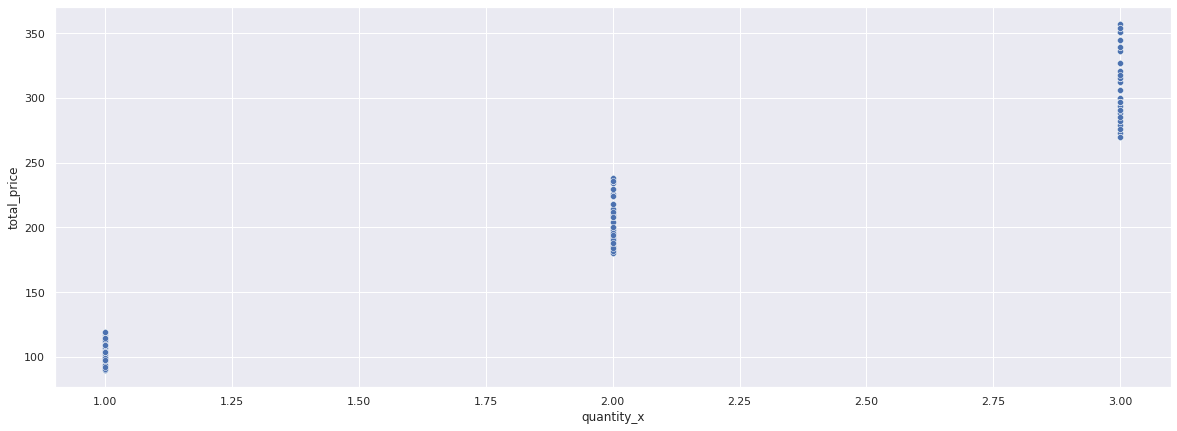

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x="quantity_x", y="total_price")
plt.show()

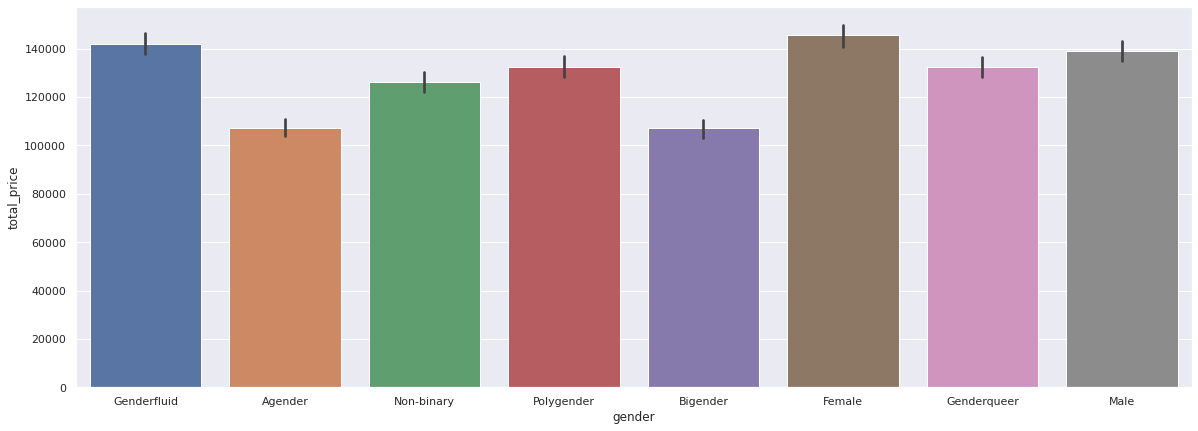

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.barplot(x="gender", y="total_price", data=df, estimator=sum)
plt.show()

# what is the most day that get highest income
day=df.groupby('name_day_order')[['total_price']].sum().sort_values(by='total_price',ascending = False)

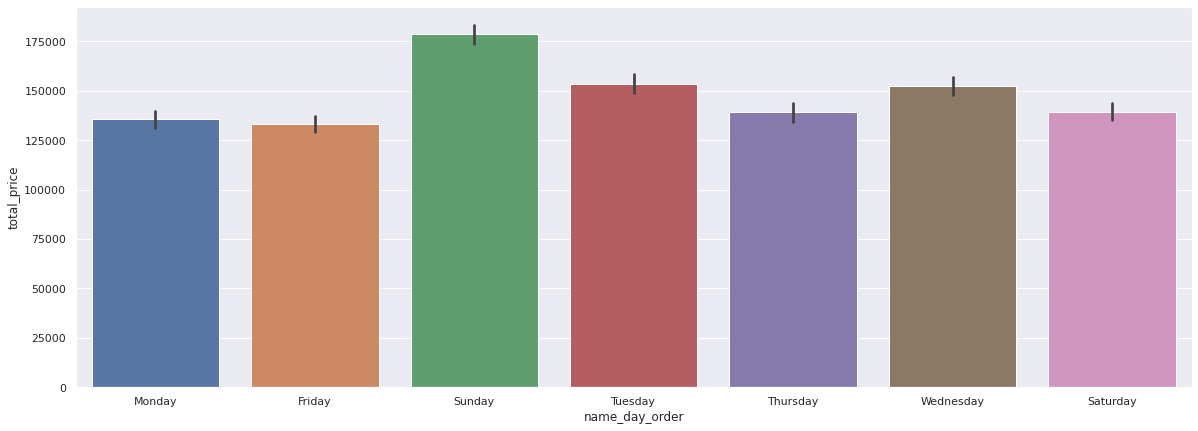

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.barplot(x="name_day_order", y="total_price", data=df, estimator=sum)
plt.show()

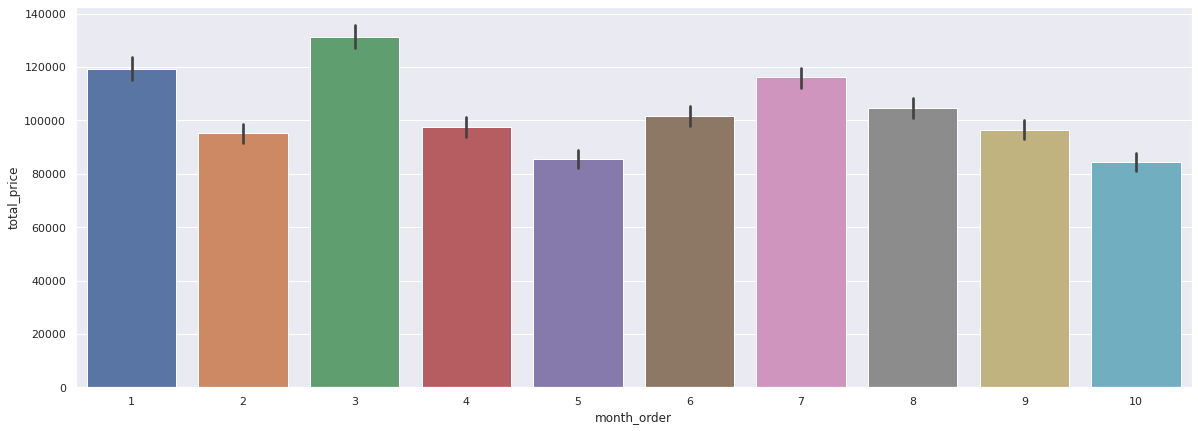

In [ ]:
# what is the highest month that get the highest sales?
mFigure = plt.figure(figsize=(20, 7))
sns.barplot(x="month_order", y="total_price", data=df, estimator=sum)
plt.show()

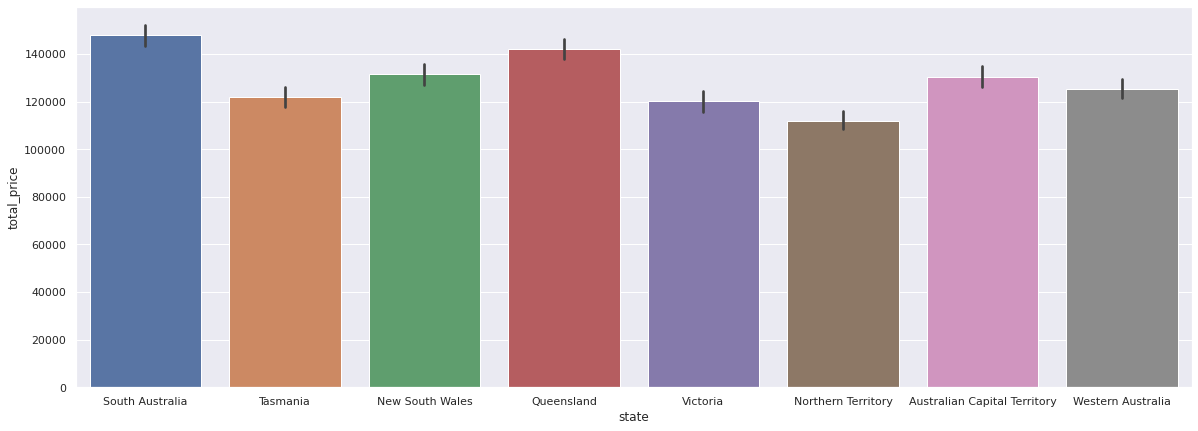

In [ ]:
# what is the highest state achieve the highest salees
mFigure = plt.figure(figsize=(20, 7))
sns.barplot(x="state", y="total_price", data=df, estimator=sum)
plt.show()

In [ ]:
# what is the highest state per gender achieve the highest sales
s_g = df.pivot_table(
    index='state',
    columns='gender',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

In [ ]:
s_g

gender                        Agender  Bigender  Female  Genderfluid  \
state                                                                  
Australian Capital Territory    22052     13657   19555        21859   
New South Wales                 12359     11830   18452        22367   
Northern Territory              13251      9869   15741        14915   
Queensland                      15977     11323   17959        20476   
South Australia                 15119     16052   18352        13847   
Tasmania                         7039     17957   21332         8866   
Victoria                         7812     10974   21343        22970   
Western Australia               13570     15352   12670        16777   

gender                        Genderqueer   Male  Non-binary  Polygender  
state                                                                     
Australian Capital Territory         8722  21623        9593       13381  
New South Wales                     10564  22248       20983       12941  
Northern Territory                  17872  11063       15450       13693  
Queensland                          23791  16768        7215       28553  
South Australia                     25088  22043       15779       21536  
Tasmania                            20278  15526       22281        8816  
Victoria                             9127  24626       10889       12616  
Western Australia                   16947   5091       24011       21012

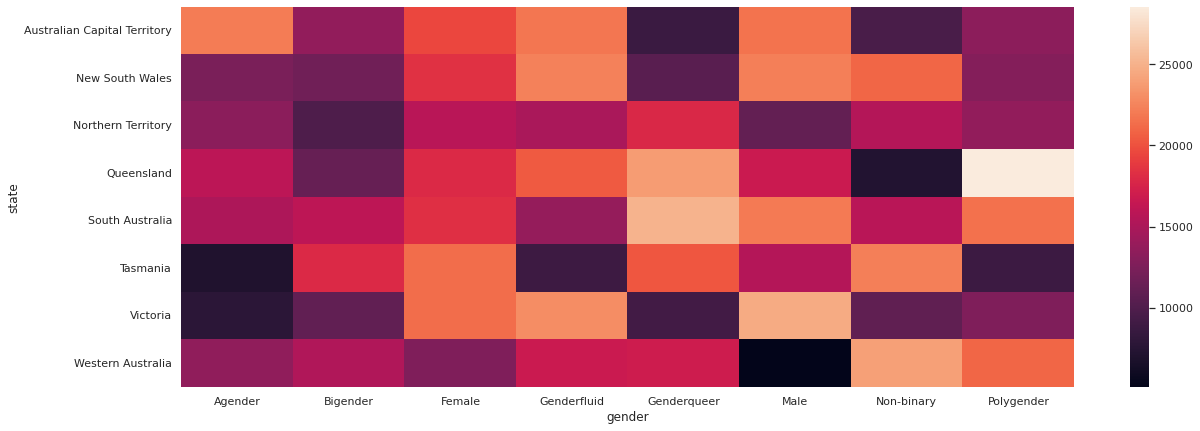

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.heatmap(s_g)
plt.show()

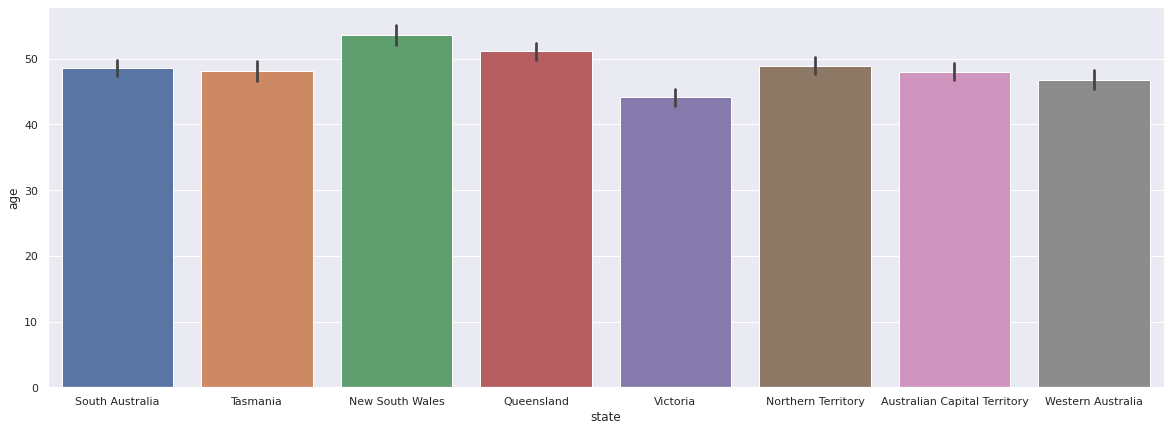

In [ ]:
from numpy import mean
# what is the average age per state
mFigure = plt.figure(figsize=(20, 7))
sns.barplot(x="state", y="age", data=df, estimator=mean)
plt.show()

In [ ]:
# what is the average age per state per each gender
age = df.pivot_table(
    index='state',
    columns='gender',
    values='age',
    aggfunc='mean',
    fill_value=0
)

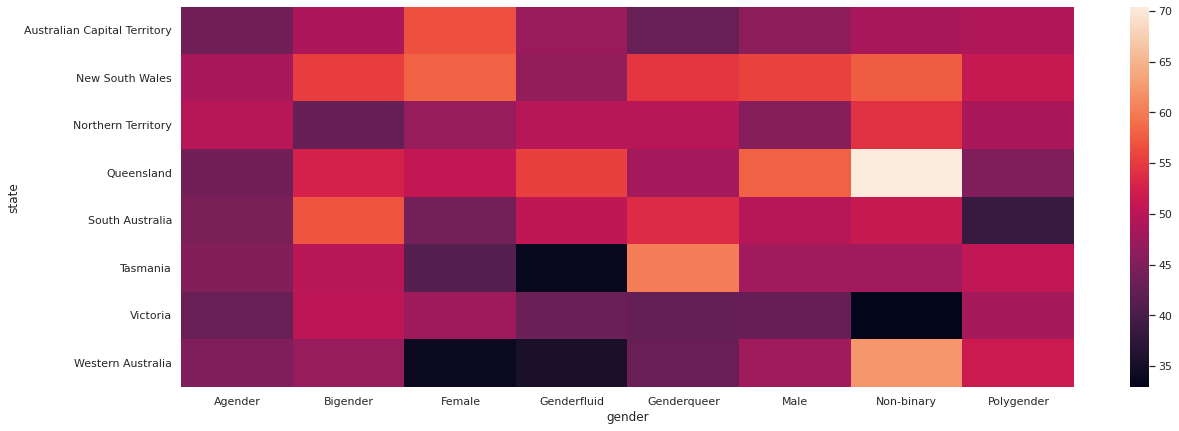

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.heatmap(age)
plt.show()

In [ ]:
df.product_type.value_counts()

Trousers    1683
Jacket      1676
Shirt       1641
Name: product_type, dtype: int64

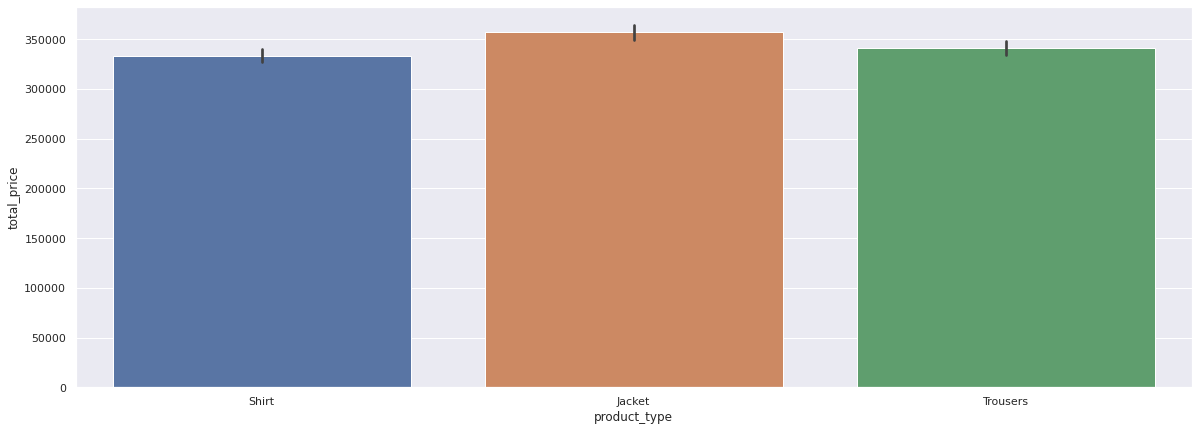

In [ ]:
# what is the product type that have the highest sales
mFigure = plt.figure(figsize=(20, 7))
sns.barplot(x="product_type", y="total_price", data=df, estimator=sum)
plt.show()

In [ ]:
# what is the color of the product type that have highest sales?
color = df.pivot_table(
                      index='colour',
                      columns='product_type',
                      values='total_price',
                      aggfunc='sum',
                      fill_value=0
                  )

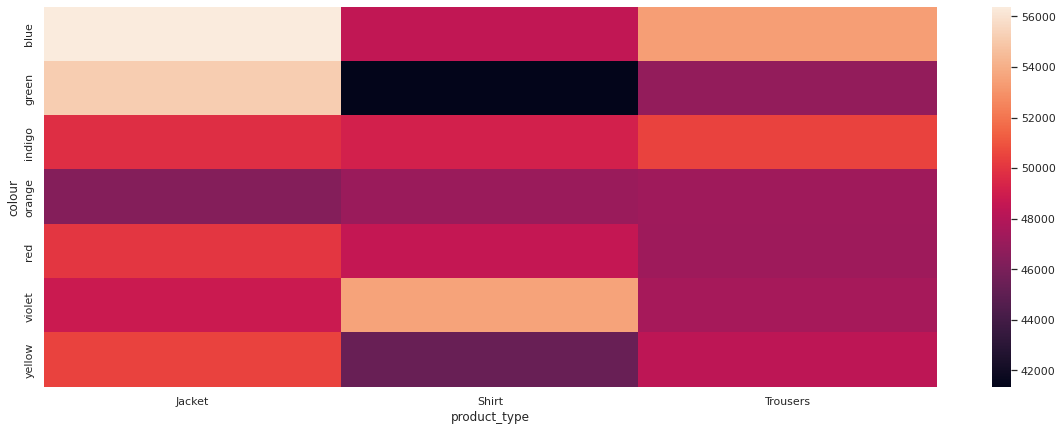

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.heatmap(color)
plt.show()

In [ ]:
date_price = df.groupby('order_date')[['total_price']].sum().sort_values(by='order_date',ascending = True)

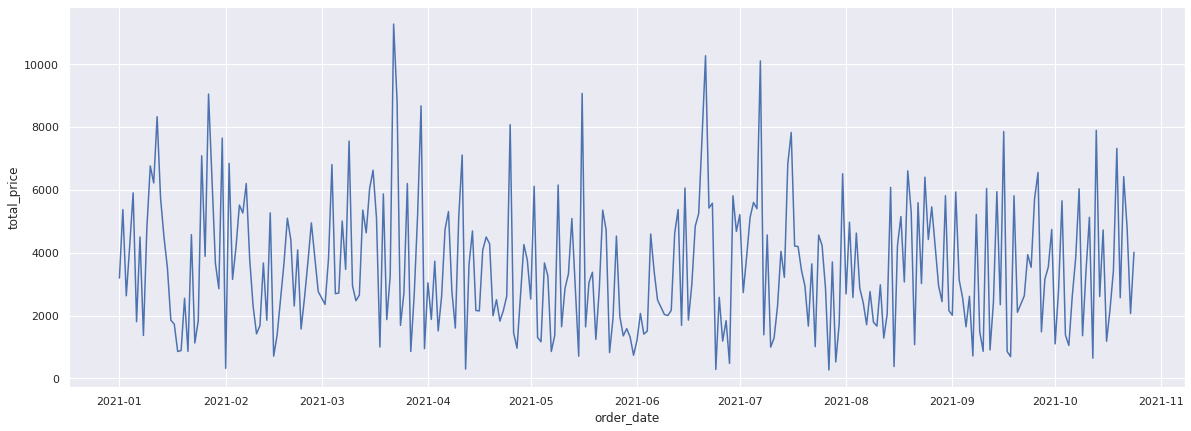

In [ ]:
mFigure = plt.figure(figsize=(20, 7))
sns.lineplot(data=date_price, x="order_date", y="total_price")
plt.show()

# congratulation for your amazing efforts